In [110]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot
from torchinfo import summary

In [3]:
# matplotlibの初期設定
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

In [4]:
#　１入力1出力
torch.manual_seed(123)

# １入力1出力の定義
l1 = nn.Linear(1, 1)

print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [6]:
for param in l1.named_parameters():
    print(param)

('weight', Parameter containing:
tensor([[-0.4078]], requires_grad=True))
('bias', Parameter containing:
tensor([0.0331], requires_grad=True))


In [9]:
# 初期値の設定 -> y = 2x + 1
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [21]:
# ですと用データ
x_np = np.arange(-2, 2.1, 1)

x = torch.tensor(x_np).float()

# (N, 1)に変更 -> weightとの積のため
x = x.view(-1, 1)

print(x.shape)
print(x)
x.dtype

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


torch.float32

In [22]:
y = l1(x)
print(y.shape)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


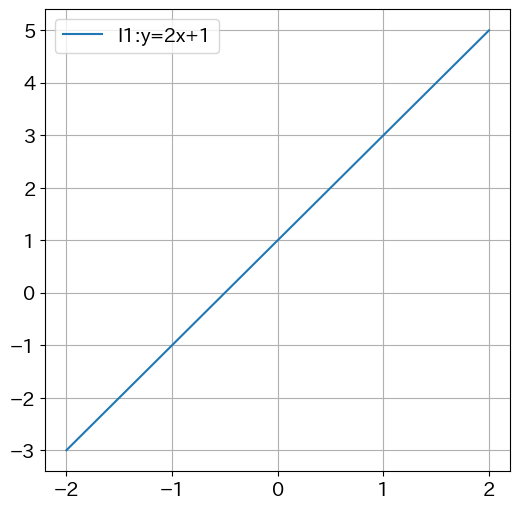

In [26]:
plt.plot(x_np, y.data, label='l1:y=2x+1')
plt.legend()


## 2入力1出力

In [27]:
# y = x1 + x2 + 2

# 入力2, 出力1
l2 = nn.Linear(2, 1)

# 初期値の設定 weight:係数、bias：定数項
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)


print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [30]:
# テスト用データ
x2_np = np.array([[0,0], [0,1], [1, 0], [1, 1]])

x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [33]:
y2 = l2(x2)
print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


## 2入力3出力

In [52]:
l3 = nn.Linear(2, 3)

nn.init.constant_(l3.weight[0, :], 1.0)
nn.init.constant_(l3.weight[1, :], 2.0)
nn.init.constant_(l3.weight[2, :], 1.0)
nn.init.constant_(l3.bias, 2.0)

print("--weight--")
print(l3.weight)
print(l3.weight.shape)
print('\n--bias--')
print(l3.bias)
print(l3.bias.shape)



--weight--
Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [1., 1.]], requires_grad=True)
torch.Size([3, 2])

--bias--
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)
torch.Size([3])


In [59]:
y3 = l3(x2)
print(y3.shape)

print(y3.data)

print('入力テンソルのshape：', x2.shape)
print('重みのshape：', l3.weight.shape)
print('出力のshape', y3.data.shape)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 3.],
        [3., 4., 3.],
        [4., 6., 4.]])
入力テンソルのshape： torch.Size([4, 2])
重みのshape： torch.Size([3, 2])
出力のshape torch.Size([4, 3])


In [63]:
# x * weight.T　+　2で表現される
np.dot(x2.data, l3.weight.data.T) + 2

array([[2., 2., 2.],
       [3., 4., 3.],
       [3., 4., 3.],
       [4., 6., 4.]], dtype=float32)

## データ準備

In [66]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", 
    skiprows=22, header=None)

In [67]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [72]:
x_org = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
pd.DataFrame(x_org)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [75]:
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 結果確認
print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [77]:
# データ絞り込み (項目 RMのみ)
x = x_org[:,feature_names == 'RM']
print('絞り込み後', x.shape)
print(x[:5,:])

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]


In [78]:
# 正解データ yの表示
print('正解データ')
print(yt[:5])

正解データ
[24.  21.6 34.7 33.4 36.2]


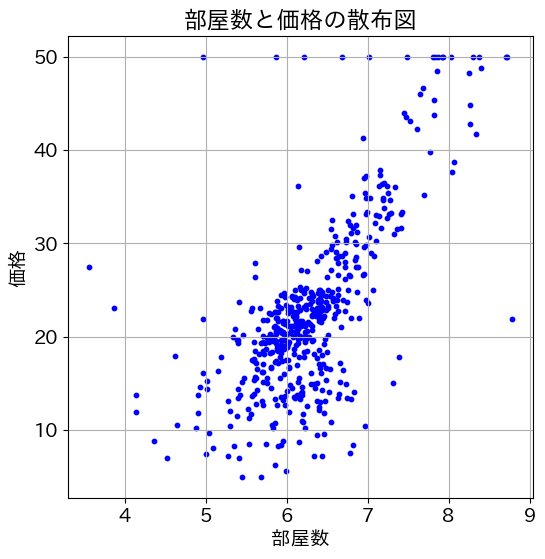

In [79]:
# 散布図の表示

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.title('部屋数と価格の散布図')
plt.show()

## モデル定義

In [82]:
# 変数定義
n_input = x.shape[1]

n_output = 1

print(f"入力次元数:{n_input}, 出力次元数:{n_output}")

入力次元数:1, 出力次元数:1


In [95]:
# クラスの定義

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        # 親クラスnn.Moduleのコンストラクタ呼び出し
        super().__init__()

        # nn.Linearのインスタンスをインスタンス変数化
        self.l1 = nn.Linear(n_input, n_output)
    
        # 初期値の設定
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 順伝播
    def forward(self, x):
        x1 = self.l1(x)
        return x1

\<point>  
・　モデル定義では必ずforward関数の定義が必要  
・　入力のinputと出力のoutputをするための処理を記述

In [96]:
# インスタンスの生成
net = Net(n_input, n_output)

In [105]:
for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1.]])
変数名: l1.bias
変数値: tensor([1.])


In [106]:
# 変数名なしでweight, biasの値をreturnする
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [129]:
summary(net, x[0].shape)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [130]:
criterion = nn.MSELoss()

lr = 0.01

optimizer = optim.SGD(net.parameters(), lr=lr)

In [134]:
next(net.parameters())

Parameter containing:
tensor([[1.]], requires_grad=True)

## 勾配降下法

In [137]:
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

print(inputs.shape)
print(labels.shape)


# criterionの引数は(N, 1)なのでlablelをview()する
labels1 = labels.view(-1, 1)

print(f"view後のshape: {labels1.shape}")

torch.Size([506, 1])
torch.Size([506])
view後のshape: torch.Size([506, 1])


In [139]:
# 予測計算
outputs = net(inputs)

# 損失計算
loss = criterion(outputs, labels1)

print(f"{loss.item():.5f}")

308.44986


In [152]:
dict(net.named_parameters())

{'l1.weight': Parameter containing:
 tensor([[1.]], requires_grad=True),
 'l1.bias': Parameter containing:
 tensor([1.], requires_grad=True)}

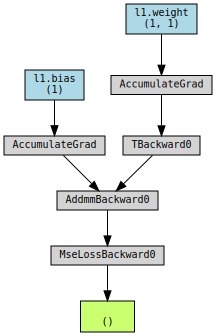

In [148]:
# 計算グラフの確認
make_dot(loss, params =dict(net.named_parameters()))

In [153]:
# 勾配計算
loss.backward()

print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [154]:
# パラメータの修正
optimizer.step()

# パラメータとバイアス値が変わる => 初期値はどちらも1.0
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [156]:
optimizer.zero_grad()

print(net.l1.weight.grad)
print(net.l1.bias.grad)


None
None


In [158]:
# 繰り返し計算
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 損失計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 154.22493
Epoch 100 loss: 29.61752
Epoch 200 loss: 29.43177
Epoch 300 loss: 29.25043
Epoch 400 loss: 29.07340
Epoch 500 loss: 28.90057
Epoch 600 loss: 28.73186
Epoch 700 loss: 28.56715
Epoch 800 loss: 28.40636
Epoch 900 loss: 28.24939
Epoch 1000 loss: 28.09615
Epoch 1100 loss: 27.94655
Epoch 1200 loss: 27.80050
Epoch 1300 loss: 27.65792
Epoch 1400 loss: 27.51873
Epoch 1500 loss: 27.38285
Epoch 1600 loss: 27.25020
Epoch 1700 loss: 27.12070
Epoch 1800 loss: 26.99428
Epoch 1900 loss: 26.87086
Epoch 2000 loss: 26.75037
Epoch 2100 loss: 26.63275
Epoch 2200 loss: 26.51792
Epoch 2300 loss: 26.40582
Epoch 2400 loss: 26.29639
Epoch 2500 loss: 26.18955
Epoch 2600 loss: 26.08525
Epoch 2700 loss: 25.98343
Epoch 2800 loss: 25.88404
Epoch 2900 loss: 25.78700
Epoch 3000 loss: 25.69226
Epoch 3100 loss: 25.59978
Epoch 3200 loss: 25.50950
Epoch 3300 loss: 25.42136
Epoch 3400 loss: 25.33532
Epoch 3500 loss: 25.25132
Epoch 3600 loss: 25.16932
Epoch 3700 loss: 25.08927
Epoch 3800 loss: 25.011

In [161]:
# 結果確認
print(f"損失初期値:{history[0, 1]:.5f}")
print(f"損失初期値:{history[-1, 1]:.5f}")

損失初期値:154.22493
損失初期値:21.80033


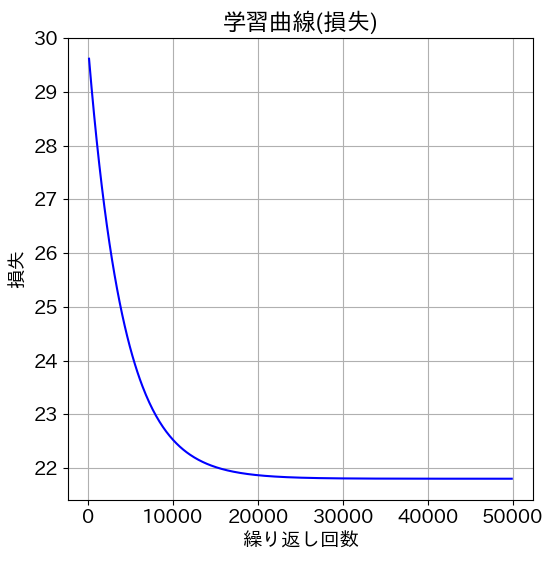

In [162]:
plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

In [168]:
# 回帰直線の算出

# xの最小値、最大値
xse = x.reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[25.1728]
 [23.7732]
 [30.7165]
 [29.017 ]
 [30.3712]
 [23.855 ]
 [20.0561]
 [21.5102]
 [16.5936]
 [19.9834]
 [23.3733]
 [20.0289]
 [18.9383]
 [19.4836]
 [20.8195]
 [18.4385]
 [19.3563]
 [19.8562]
 [15.0031]
 [17.466 ]
 [16.0392]
 [19.629 ]
 [21.2376]
 [18.2476]
 [19.2564]
 [16.3027]
 [18.2476]
 [20.3742]
 [24.4457]
 [26.0725]
 [17.3388]
 [20.6014]
 [19.4927]
 [17.2297]
 [20.8195]
 [19.3382]
 [18.5021]
 [18.5839]
 [19.6381]
 [25.3545]
 [29.2533]
 [26.9449]
 [21.483 ]
 [21.8647]
 [20.5742]
 [17.0571]
 [18.0022]
 [20.2197]
 [14.4851]
 [16.33  ]
 [19.6108]
 [20.9922]
 [24.5911]
 [19.9289]
 [18.9292]
 [31.2982]
 [23.4278]
 [27.363 ]
 [21.2649]
 [19.2836]
 [17.5933]
 [19.6381]
 [24.0913]
 [26.8722]
 [29.9804]
 [22.5826]
 [18.0113]
 [18.8383]
 [16.2573]
 [18.9019]
 [23.7368]
 [19.5926]
 [20.5378]
 [22.1737]
 [22.4281]
 [22.5463]
 [22.4827]
 [21.2194]
 [22.0555]
 [18.802 ]
 [26.5542]
 [25.5726]
 [22.6917]
 [21.4648]
 [23.4824]
 [25.6726]
 [20.0834]
 [21.0467]
 [29.0988]
 [29.7532]
 [23.7368]

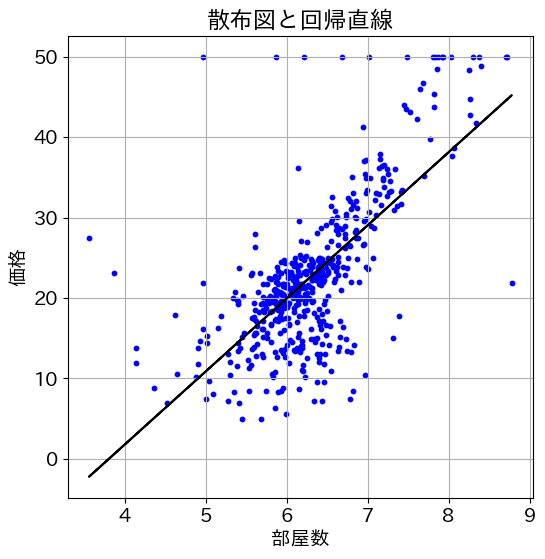

In [169]:
# 散布図と回帰直線の描画

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()

## 重回帰モデルへの拡張

In [170]:
# 列(LSTAT: 低所得者率)の追加

x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))

# shapeの表示
print(x2.shape)

# 入力データxの表示
print(x2[:5,:])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [172]:
n_input = x2.shape[1]
print(n_input)
net = Net(n_input, n_output)

2


In [175]:
for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1., 1.]])
変数名: l1.bias
変数値: tensor([1.])


In [176]:
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [179]:
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [181]:
# 新しい特徴量のテンソル化
nputs = torch.tensor(x2).float()

In [183]:
# 初期化処理

# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))


# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 3753837073642659568666615480320.00000
Epoch 200 loss: inf
Epoch 300 loss: nan
Epoch 400 loss: nan
Epoch 500 loss: nan
Epoch 600 loss: nan
Epoch 700 loss: nan
Epoch 800 loss: nan
Epoch 900 loss: nan
Epoch 1000 loss: nan
Epoch 1100 loss: nan
Epoch 1200 loss: nan
Epoch 1300 loss: nan
Epoch 1400 loss: nan
Epoch 1500 loss: nan
Epoch 1600 loss: nan
Epoch 1700 loss: nan
Epoch 1800 loss: nan
Epoch 1900 loss: nan
Epoch 2000 loss: nan
Epoch 2100 loss: nan
Epoch 2200 loss: nan
Epoch 2300 loss: nan
Epoch 2400 loss: nan
Epoch 2500 loss: nan
Epoch 2600 loss: nan
Epoch 2700 loss: nan
Epoch 2800 loss: nan
Epoch 2900 loss: nan
Epoch 3000 loss: nan
Epoch 3100 loss: nan
Epoch 3200 loss: nan
Epoch 3300 loss: nan
Epoch 3400 loss: nan
Epoch 3500 loss: nan
Epoch 3600 loss: nan
Epoch 3700 loss: nan
Epoch 3800 loss: nan
Epoch 3900 loss: nan
Epoch 4000 loss: nan
Epoch 4100 loss: nan
Epoch 4200 loss: nan
Epoch 4300 loss: nan
Epoch 4400 loss: nan
Epoch 4500 loss: nan
Epoch 

<ポイント>  
lossがinf->nanになっているので、発散したと思われる。  
学習率が0.01で大きかったことが原因と思われる。

In [184]:
# 学習率の変更
num_epoch=2000

lr=0.001

net = Net(n_input, n_output)

optimizer = optim.SGD(net.parameters(), lr=lr)

criterion = nn.MSELoss()

In [188]:
# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))


# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 25.35892
Epoch 200 loss: 16.39105
Epoch 300 loss: 15.40301
Epoch 400 loss: 15.29414
Epoch 500 loss: 15.28211
Epoch 600 loss: 15.28076
Epoch 700 loss: 15.28059
Epoch 800 loss: 15.28054
Epoch 900 loss: 15.28051
Epoch 1000 loss: 15.28048
Epoch 1100 loss: 15.28046
Epoch 1200 loss: 15.28043
Epoch 1300 loss: 15.28040
Epoch 1400 loss: 15.28037
Epoch 1500 loss: 15.28034
Epoch 1600 loss: 15.28031
Epoch 1700 loss: 15.28028
Epoch 1800 loss: 15.28026
Epoch 1900 loss: 15.28023
Epoch 2000 loss: 15.28020
Epoch 2100 loss: 15.28017
Epoch 2200 loss: 15.28014
Epoch 2300 loss: 15.28012
Epoch 2400 loss: 15.28009
Epoch 2500 loss: 15.28006
Epoch 2600 loss: 15.28003
Epoch 2700 loss: 15.28000
Epoch 2800 loss: 15.27997
Epoch 2900 loss: 15.27995
Epoch 3000 loss: 15.27992
Epoch 3100 loss: 15.27989
Epoch 3200 loss: 15.27986
Epoch 3300 loss: 15.27984
Epoch 3400 loss: 15.27981
Epoch 3500 loss: 15.27978
Epoch 3600 loss: 15.27975
Epoch 3700 loss: 15.27972
Epoch 3800 loss: 15.279

In [190]:
print(f"損失初期値：{history[0, 1]:.5f}")
print(f"損失初期値：{history[-1, 1]:.5f}")


損失初期値：112.06398
損失初期値：15.26984


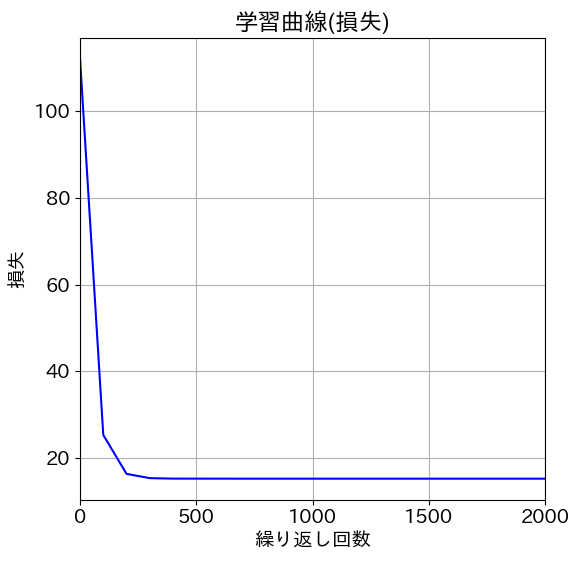

In [193]:

plt.plot(history[:,0], history[:,1], 'b')
plt.xlim((0, 2000))
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()